In [203]:
NUM = 15 

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, AgglomerativeClustering, DBSCAN, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

In [205]:
X = pd.read_csv('s1.txt', delim_whitespace=True, header=None)

X = pd.DataFrame(X)

X.columns = ['x' , 'y']

In [206]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = NUM)
kmeans.fit(X)

/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15)

In [207]:
labels = kmeans.labels_

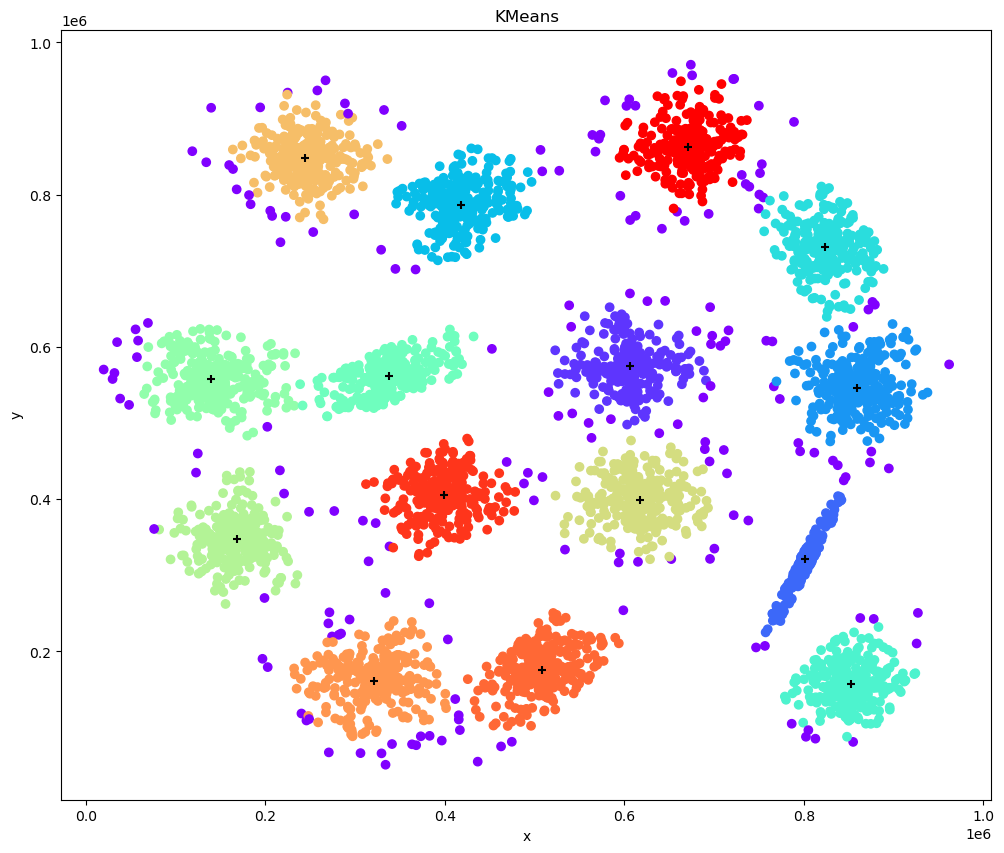

In [217]:
plt.figure(figsize = (12, 10))

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = labels, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '+', color = 'black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('KMeans')
plt.show()

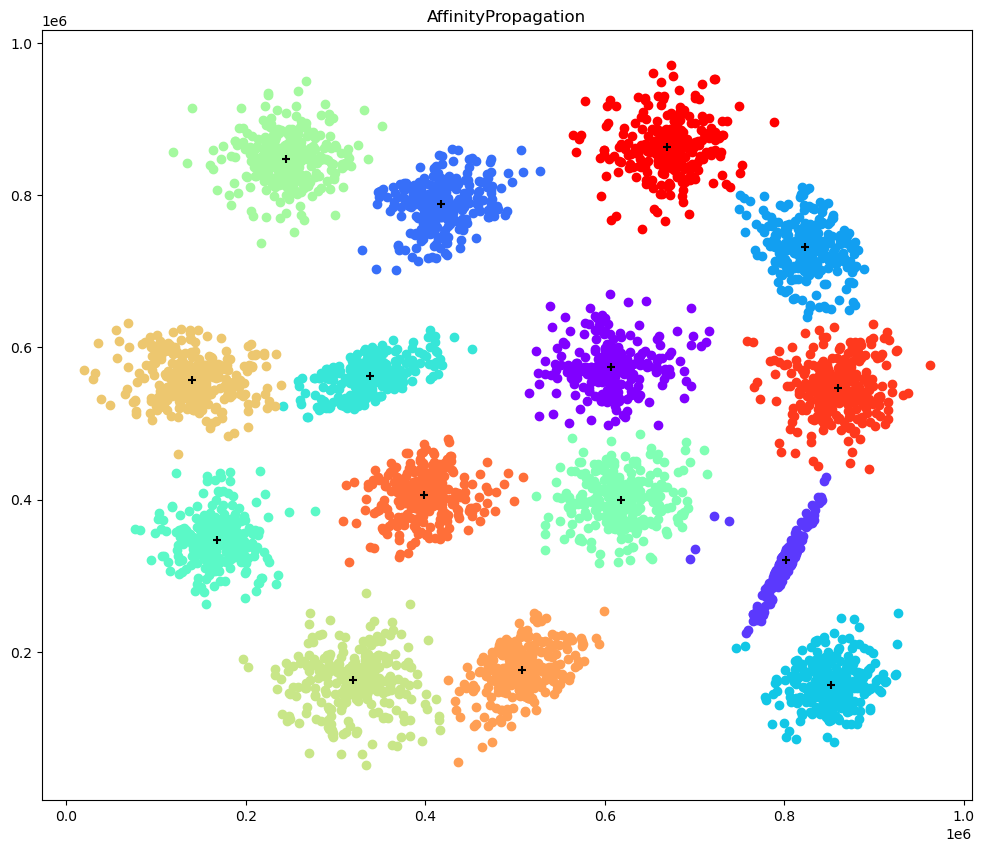

In [216]:
affinity_propagation = AffinityPropagation(damping = 0.9, preference = -999999999999)
affinity_propagation.fit(X)

cluster_labels = affinity_propagation.labels_
unique_labels = np.unique(cluster_labels)
clrs = plt.get_cmap('rainbow', len(unique_labels))

plt.figure(figsize = (12, 10))
for label in unique_labels:
    cluster_data = X[cluster_labels == label]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], c = [clrs(label)])

cluster_centers_indices = affinity_propagation.cluster_centers_indices_
centroids = X.iloc[cluster_centers_indices]

plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker = '+', color = 'black')

plt.title('AffinityPropagation')
plt.show()

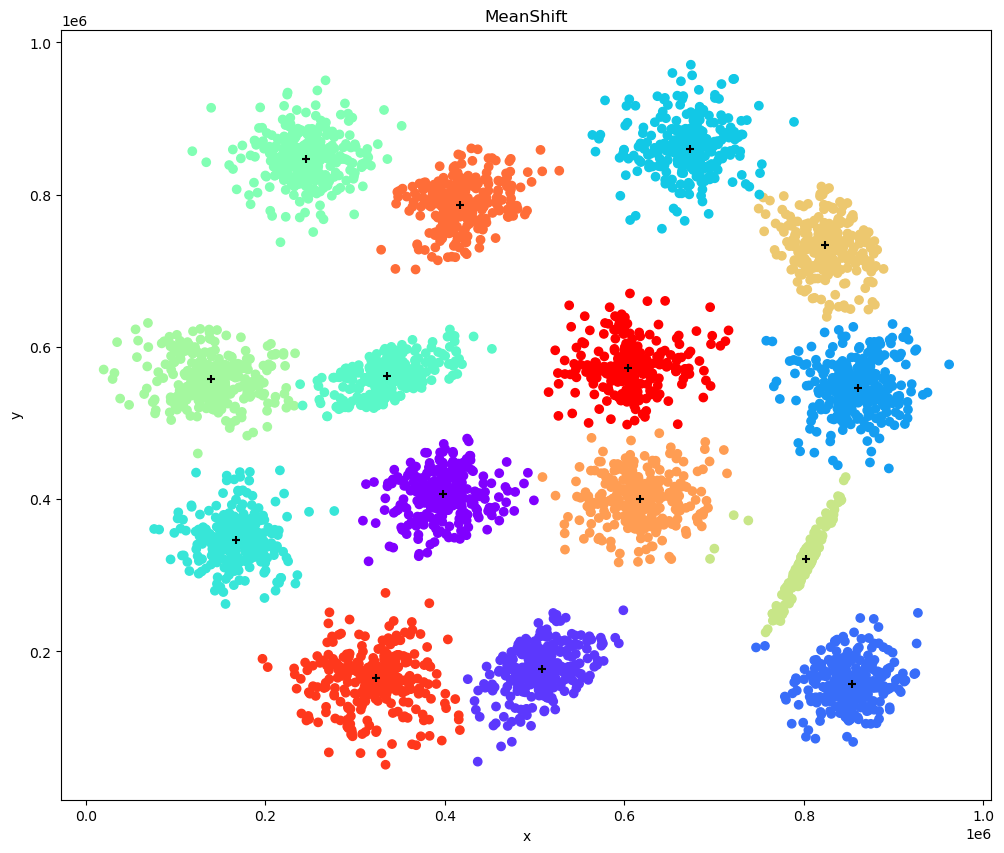

In [215]:
bandwidth = estimate_bandwidth(X, quantile = 0.05)

ms = MeanShift(bandwidth = bandwidth) 
ms.fit(X) 
msLabels = ms.labels_

centroids = ms.cluster_centers_

plt.figure(figsize = (12, 10))
plt.scatter(X['x'], X['y'], c = msLabels, cmap = 'rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '+', color = 'black')
plt.title('MeanShift')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

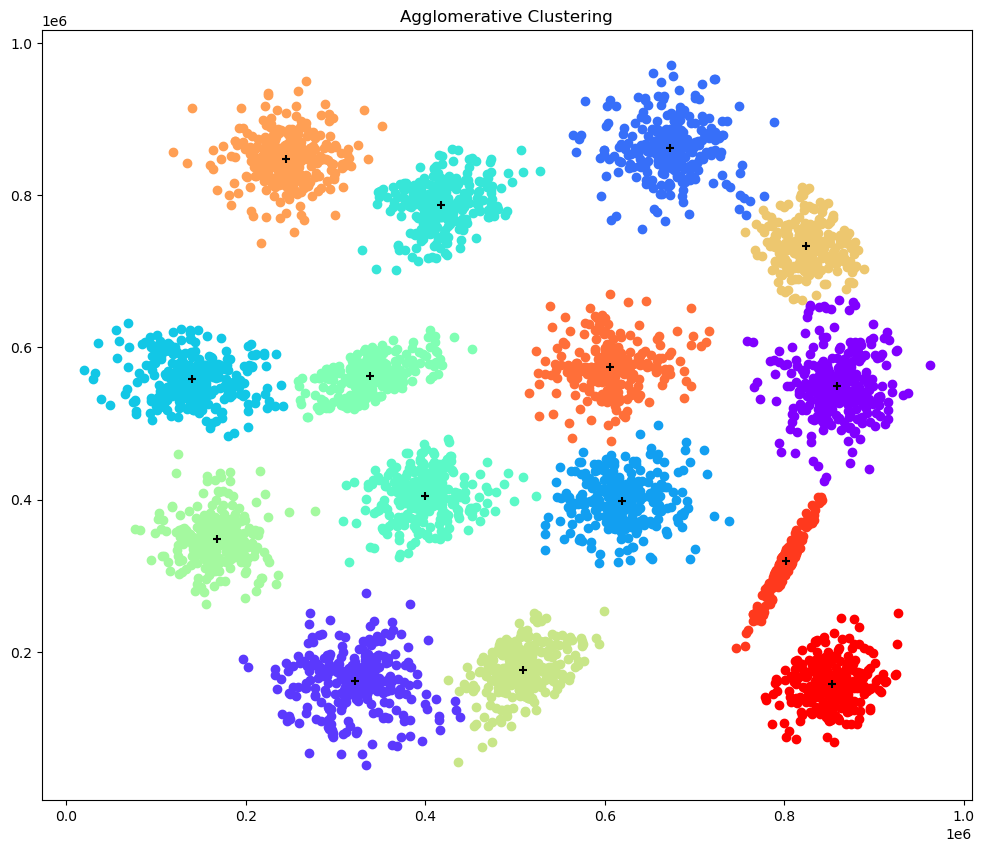

In [214]:
agglomerativeClustering = AgglomerativeClustering(n_clusters = NUM)
clusterLabels = agglomerativeClustering.fit_predict(X)
clusterCenters = np.zeros((NUM, X.shape[1]))

clrs = plt.get_cmap('rainbow', NUM)

plt.figure(figsize = (12, 10))

for label in range(NUM):
    clusterX = X[clusterLabels == label]
    plt.scatter(clusterX.iloc[:, 0], clusterX.iloc[:, 1], c = [clrs(label)])
    clusterCenter = clusterX.mean(axis=0)
    clusterCenters[label] = clusterCenter

plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], marker = '+', c = 'black')
plt.title('Agglomerative Clustering')
plt.show()

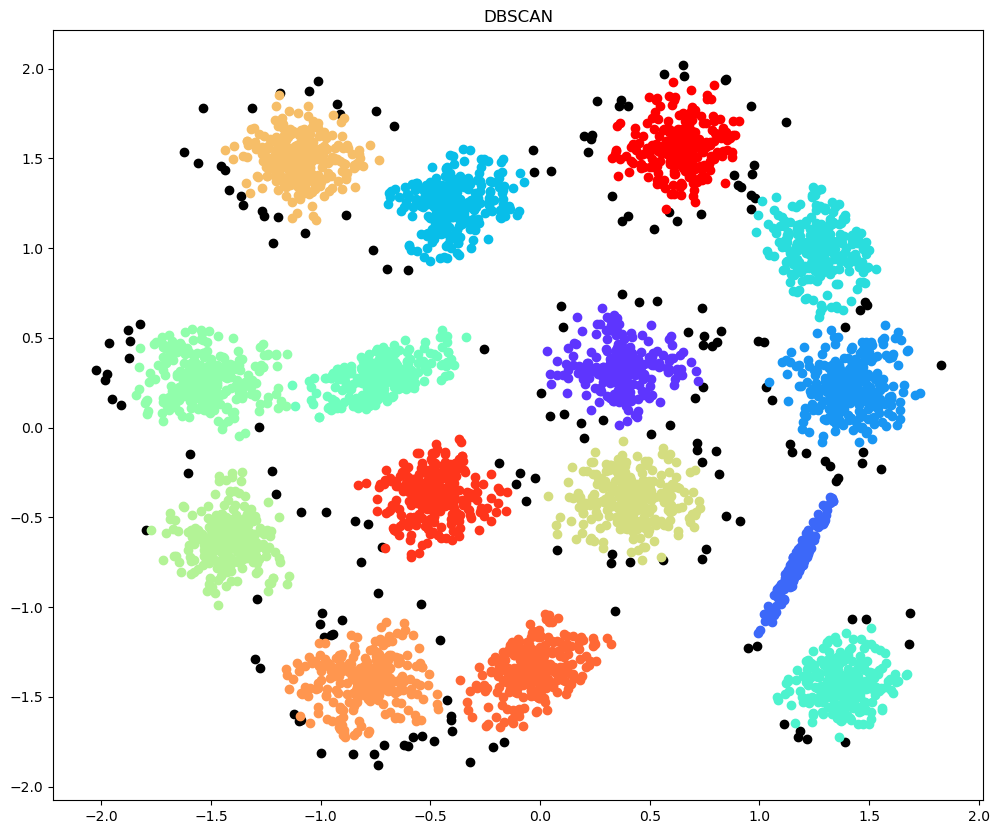

In [213]:
dbscan = DBSCAN(eps = 0.1, min_samples = 10)
dbscan.fit(data)
labels = dbscan.labels_

uniqueLabels = np.unique(labels)
clrs = plt.cm.rainbow(np.linspace(0, 1, NUM + 1))

plt.figure(figsize = (12, 10))

for label, clrs in zip(uniqueLabels, clrs):
    if label == -1:
        clrs = 'black'
    clusterPoints = data[labels == label]
    plt.scatter(clusterPoints[:, 0], clusterPoints[:, 1], color = clrs) 
    
plt.title('DBSCAN')
plt.show()